In [2]:
import calendar
import datetime
import importlib 
import numpy as np
import os
import sys
from datetime import timedelta
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from parcels import Field, FieldSet, ParticleSet, Variable, JITParticle

sys.path.append('/home/vicentev/projects/def-allen/vicentev/analysis-vicente/OP_nibi')
from OP_functions_nibi import *

In [ ]:
config_yaml = ['/home/vicentev/projects/def-allen/vicentev/analysis-vicente/OP_nibi/config_files/config_file_OP_P1.yaml']
param = load_config(config_yaml)
#
lon_iona = param['constants']['lon_iona'] # Longitude coordinate
lat_iona = param['constants']['lat_iona'] # Latitude coordinate

In [ ]:
mask = xr.open_dataset('/home/vicentev/projects/def-allen/vicentev/analysis-vicente/grid/mesh_mask202108_TDV.nc')
from matplotlib.colors import ListedColormap, BoundaryNorm
# Colormap for mask
colors_0 = [(0, 0, 0, 1),  # Black for land
          (0, 0, 0, 0)]  # Transparent for water
cmap = ListedColormap(colors_0)

In [ ]:
vars_to_keep = ['trajectory', 'obs', 'lon', 'lat', 'z', 'time', 'status']

In [ ]:
filename_JAN1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P1.zarr'
filename_JAN1_R1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/RESTART_Runs/PBDEs_0112007_run_365_days_P1_restart_86_days_R1.zarr'
filename_JAN1_R1_1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/RESTART_Runs/PBDEs_0112007_run_365_days_P1_restart_86_days_R1_restart_36_days_R1_1.zarr'
data_JAN1 = xr.open_dataset(filename_JAN1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_JAN1, engine = 'zarr').variables if v not in vars_to_keep])
data_JAN1_R1 = xr.open_dataset(filename_JAN1_R1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_JAN1_R1, engine = 'zarr').variables if v not in vars_to_keep])
data_JAN1_R1_1 = xr.open_dataset(filename_JAN1_R1_1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_JAN1_R1_1, engine = 'zarr').variables if v not in vars_to_keep])
###
offset = data_JAN1.obs.values[-1]
new_obs = offset + np.arange(1, len(data_JAN1_R1.obs) + 1)
data_JAN1_R1 = data_JAN1_R1.assign_coords(obs=new_obs)
#
offset_1 = data_JAN1_R1.obs.values[-1]
new_obs_1 = offset_1 + np.arange(1, len(data_JAN1_R1_1.obs) + 1)
data_JAN1_R1_1 = data_JAN1_R1_1.assign_coords(obs=new_obs_1)
###
data_JAN = xr.concat([data_JAN1, data_JAN1_R1.isel(obs=slice(1, None)), data_JAN1_R1_1.isel(obs=slice(1, -7))], dim='obs')
data_JAN.dims

In [ ]:
filename_FEB = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P2.zarr'
data_FEB = xr.open_dataset(filename_FEB, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_FEB, engine = 'zarr').variables if v not in vars_to_keep])
data_FEB.dims

In [ ]:
filename_MAR = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P3.zarr'
data_MAR = xr.open_dataset(filename_MAR, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_MAR, engine = 'zarr').variables if v not in vars_to_keep])
data_MAR.dims

In [ ]:
filename_APR1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P4.zarr'
filename_APR1_R1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/RESTART_Runs/PBDEs_0112007_run_365_days_P4_restart_15_days_R4.zarr'
data_APR1 = xr.open_dataset(filename_APR1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_APR1, engine = 'zarr').variables if v not in vars_to_keep])
data_APR1_R1 = xr.open_dataset(filename_APR1_R1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_APR1_R1, engine = 'zarr').variables if v not in vars_to_keep])
###
offset = data_APR1.obs.values[-1]
new_obs = offset + np.arange(1, len(data_APR1_R1.obs) + 1)
data_APR1_R1 = data_APR1_R1.assign_coords(obs=new_obs)
###
data_APR = xr.concat([data_APR1, data_APR1_R1.isel(obs=slice(1, -1))], dim='obs')
data_APR.dims

In [ ]:
filename_MAY1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P5.zarr'
filename_MAY1_R1 = '/home/vicentev/scratch/vicentev/Simulations_Runs/RESTART_Runs/PBDEs_0112007_run_365_days_P5_restart_5_days_R5.zarr'
data_MAY1 = xr.open_dataset(filename_MAY1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_MAY1, engine = 'zarr').variables if v not in vars_to_keep])
data_MAY1_R1 = xr.open_dataset(filename_MAY1_R1, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_MAY1_R1, engine = 'zarr').variables if v not in vars_to_keep])
###
offset = data_MAY1.obs.values[-1]
new_obs = offset + np.arange(1, len(data_MAY1_R1.obs) + 1)
data_MAY1_R1 = data_MAY1_R1.assign_coords(obs=new_obs)
###
data_MAY = xr.concat([data_MAY1, data_MAY1_R1.isel(obs=slice(1, None))], dim='obs')
data_MAY.dims

In [ ]:
filename_JUN = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P6.zarr'
data_JUN = xr.open_dataset(filename_JUN, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_JUN, engine = 'zarr').variables if v not in vars_to_keep])
data_JUN.dims

In [ ]:
filename_JUL = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P7.zarr'
data_JUL = xr.open_dataset(filename_JUL, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_JUL, engine = 'zarr').variables if v not in vars_to_keep])
data_JUL.dims

In [ ]:
filename_AUG = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P8.zarr'
data_AUG = xr.open_dataset(filename_AUG, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_AUG, engine = 'zarr').variables if v not in vars_to_keep])
data_AUG.dims

In [ ]:
data_AUG.time[0,-1].values

In [ ]:
filename_SEP = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P9.zarr'
data_SEP = xr.open_dataset(filename_SEP, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_SEP, engine = 'zarr').variables if v not in vars_to_keep])
data_SEP.dims

In [ ]:
filename_OCT = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P10.zarr'
data_OCT = xr.open_dataset(filename_OCT, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_OCT, engine = 'zarr').variables if v not in vars_to_keep])
data_OCT.dims

In [ ]:
filename_NOV = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P11.zarr'
data_NOV = xr.open_dataset(filename_NOV, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_NOV, engine = 'zarr').variables if v not in vars_to_keep])
data_NOV.dims

In [ ]:
filename_DEC = '/home/vicentev/scratch/vicentev/Simulations_Runs/PBDEs_0112007_run_365_days_P12.zarr'
data_DEC = xr.open_dataset(filename_DEC, engine = 'zarr', drop_variables=[v for v in xr.open_dataset(filename_DEC, engine = 'zarr').variables if v not in vars_to_keep])
data_DEC.dims

In [ ]:
data2 = xr.concat([data_AUG, data_SEP, data_OCT, data_NOV, data_DEC], dim = 'trajectory')

In [4]:
path_5months_netcdf = '/home/vicentev/scratch/vicentev/Simulations_Runs/5_of_12_months_release_netCDF.nc'

In [ ]:
data2.to_netcdf(path_5months_netcdf ,mode='w')

In [ ]:
data2.status[:,-1]

Saving 7 months of release data into a netCDF to save disk space and number of files (zarr to netCDF)!!

In [5]:
path_7months_netcdf = '/home/vicentev/scratch/vicentev/Simulations_Runs/7_of_12_months_release_netCDF.nc'

In [ ]:
data.to_netcdf(path_7months_netcdf ,mode='w')

In [ ]:
data.dims

In [6]:
data1 = xr.open_dataset(path_7months_netcdf)
data1v2 = data1.isel(obs=slice(0, -1))
data1v2 = data1v2.drop_isel(obs=3341)
data2 = xr.open_dataset(path_5months_netcdf)

In [11]:
data = xr.concat([data1v2, data2], dim = 'trajectory')

/tmp/ipykernel_2451768/2158752256.py:1: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'obs' ('obs',) The recommendation is to set join explicitly for this case.
  data = xr.concat([data1v2, data2], dim = 'trajectory')


In [ ]:
DATA = data.isel(obs=slice(0, -1))

In [22]:
path_12months_netcdf = '/home/vicentev/scratch/vicentev/Simulations_Runs/12_months_release_netCDF.nc'
DATA.to_netcdf(path_12months_netcdf ,mode='w')

In [ ]:

unique_vals, first_idx, counts = np.unique(data1v2.time[0,:].values, return_index=True, return_counts=True)

In [ ]:
first_idx

In [ ]:
data1v2.time[0,3956].values

In [ ]:
plt.plot(data.status[:,-1].values, '.')

In [19]:
status = DATA.status  # shape: (n_particles, n_obs)
valid = np.isfinite(status)

# Count all finite entries per column
total = np.count_nonzero(valid, axis=0)

# Define single-value status codes
codes = {
    "sewage_water": 1,
    "colloidal_water": 2,
    "marine_water": 3,
    "sewage_sediment": 11,
    "colloidal_sediment": 12,
    "marine_sediment": 13,
    "particles_jdf": 7,
    "particles_js": 8,
}

# Count occurrences for each single code
counts = {
    name: np.count_nonzero(valid & (status == code), axis=0)
    for name, code in codes.items()
}

# Handle multi-value condition for "initial" (-1 or -2)
counts["initial"] = np.count_nonzero(valid & ((status == -1) | (status == -2)), axis=0)

# Compute proportions (%)
proportions = {
    name: counts[name] / total * 100
    for name in counts
}

# Example access
proportion_initial = proportions["initial"]
proportion_colloidal_water = proportions["colloidal_water"]
proportion_marine_water = proportions["marine_water"]
proportion_sewage_water = proportions["sewage_water"]
proportion_colloidal_sediment = proportions["colloidal_sediment"]
proportion_marine_sediment = proportions["marine_sediment"]
proportion_sewage_sediment = proportions["sewage_sediment"]
p_out_jdf = proportions["particles_jdf"]
p_out_js = proportions["particles_js"]


In [20]:
proportion_water = proportion_sewage_water + proportion_colloidal_water + proportion_marine_water
proportion_sediment = proportion_sewage_sediment + proportion_colloidal_sediment + proportion_marine_sediment
proportion_sewage = proportion_sewage_water + proportion_sewage_sediment 
proportion_colloidal = proportion_colloidal_water + proportion_colloidal_sediment 
proportion_marine = proportion_marine_water + proportion_marine_sediment 

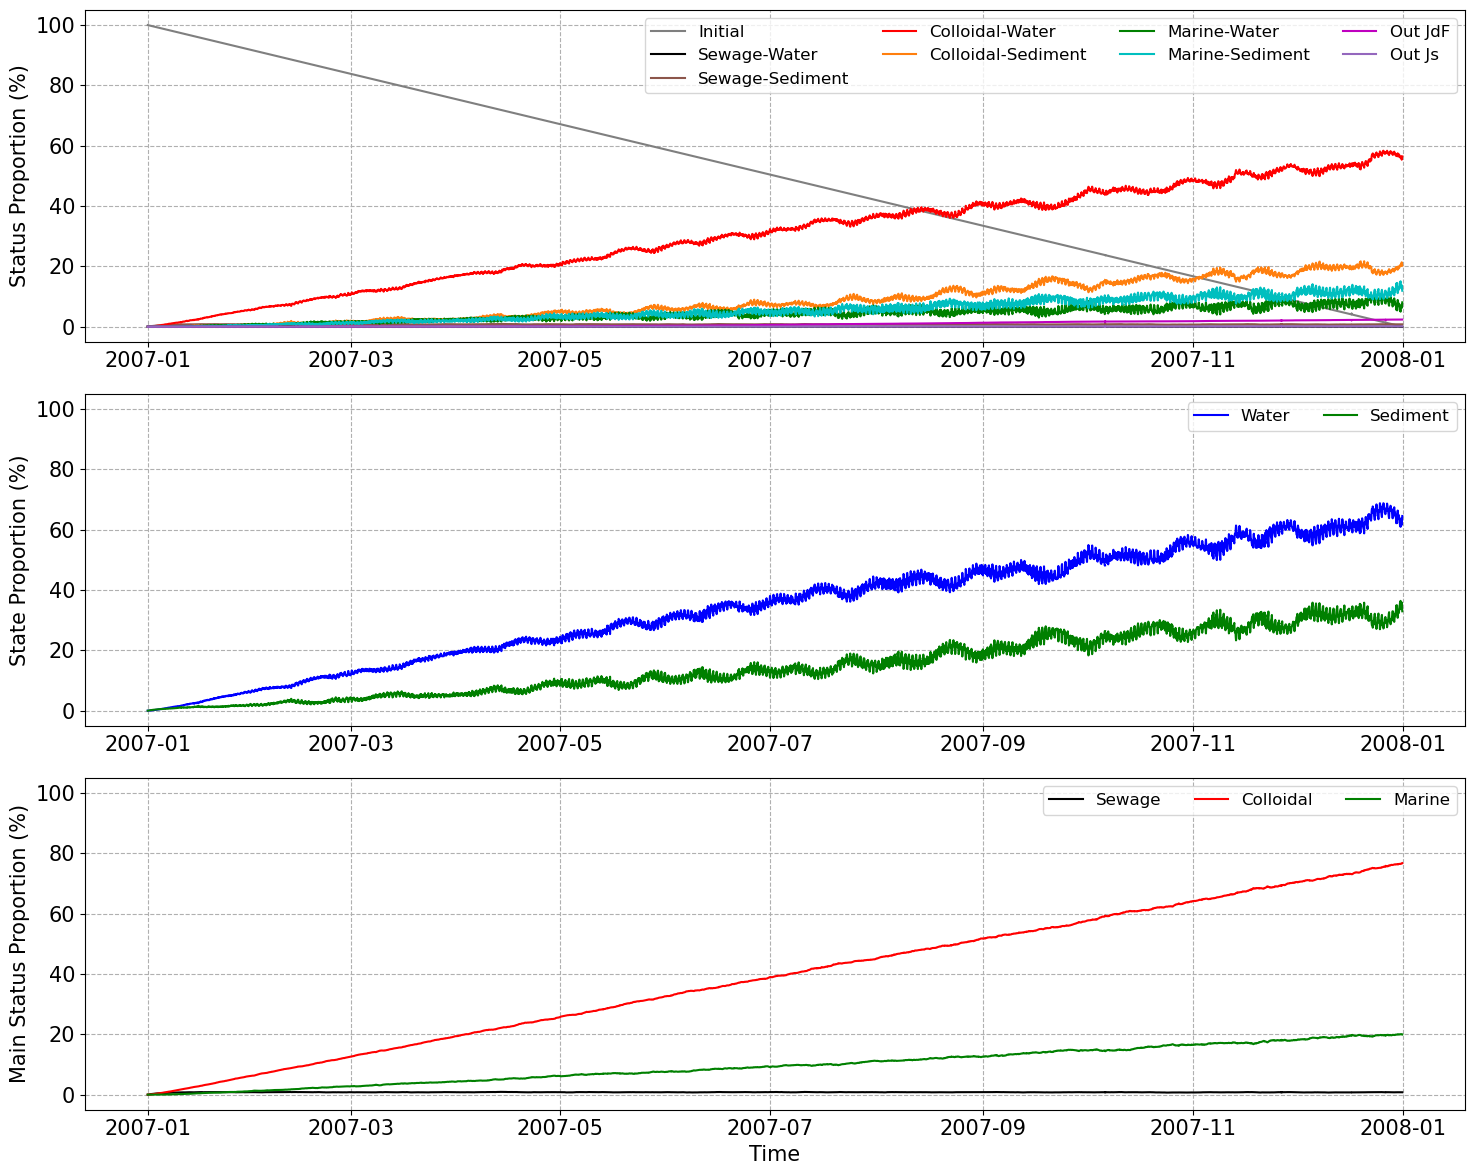

In [21]:
plt.rcParams.update({'font.size': 15})
time_axis = DATA.time[0,:].values
fig, ax = plt.subplots(3,1,figsize = (15,12))
# initial
ax[0].plot(time_axis, proportion_initial, '-' ,c = 'tab:grey', label = 'Initial')
# Sewage particles in the water column
ax[0].plot(time_axis, proportion_sewage_water, '-' ,c = 'k', label = 'Sewage-Water')
ax[0].plot(time_axis, proportion_sewage_sediment, '-' , c = 'tab:brown', label = 'Sewage-Sediment')
#
#  Colloidal particles in the water column
ax[0].plot(time_axis, proportion_colloidal_water, '-' ,c = 'r', label = 'Colloidal-Water')
ax[0].plot(time_axis, proportion_colloidal_sediment, '-' , c = 'tab:orange', label = 'Colloidal-Sediment')
#
# Marine particles in the water column
ax[0].plot(time_axis, proportion_marine_water, '-' ,c = 'g', label = 'Marine-Water')
ax[0].plot(time_axis, proportion_marine_sediment, '-' , c = 'c', label = 'Marine-Sediment')
#
ax[0].plot(time_axis, p_out_jdf, '-' , c = 'm', label = 'Out JdF')
ax[0].plot(time_axis, p_out_js, '-' , c = 'tab:purple', label = 'Out Js')


#
ax[0].legend(ncol = 4, fontsize = 12)
ax[0].grid(linestyle = '--')
#
ax[0].set_ylabel('Status Proportion (%)')
#
ax[0].set_ylim([-5,105])
###################################################
ax[1].plot(time_axis, proportion_water, '-b', label = 'Water')
ax[1].plot(time_axis, proportion_sediment, '-g', label = 'Sediment')
#
ax[1].legend(ncol = 2, fontsize = 12)
ax[1].grid(linestyle = '--')
ax[1].set_ylabel('State Proportion (%)')
ax[1].set_ylim([-5,105])
###################################################
ax[2].plot(time_axis, proportion_sewage, '-k', label = 'Sewage')
ax[2].plot(time_axis, proportion_colloidal, '-r', label = 'Colloidal')
ax[2].plot(time_axis, proportion_marine, '-g' , label = 'Marine')
ax[2].legend(ncol = 3, fontsize = 12)
ax[2].grid(linestyle = '--')
ax[2].set_ylabel('Main Status Proportion (%)')
ax[2].set_xlabel('Time')
ax[2].set_ylim([-5,105])
plt.tight_layout()